In [1]:
import streamlit as st
import torch
import numpy as np

from generator import Generator
from discriminator import Discriminator
from utils import set_seed

In [51]:
G = Generator().eval()
D = Discriminator().eval()
G.load_state_dict(torch.load('netG_epoch_541.pth', map_location='cpu'))
D.load_state_dict(torch.load('netD_epoch_541.pth', map_location='cpu'))

def generate_image(seed, threshold, max_generate)->list((np.array, float)):
    with torch.no_grad():
        set_seed(seed)
        imgs_preds = []
        for _ in range(max_generate):
            noise = torch.randn(1, 100, 1, 1)
            imtensor = G(noise)
            imarray = imtensor.squeeze(0).detach().numpy().transpose(1, 2, 0)
            pred = D(imtensor).sigmoid().item()
            if pred > threshold:
                imgs_preds.append((imarray, pred))
    return imgs_preds
    


In [30]:
imgs_preds = generate_image(0, 0.5, 100)

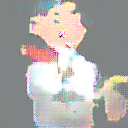

In [37]:
from PIL import Image
img = imgs_preds[0][0]
img = img.squeeze(0).detach().numpy().transpose(1, 2, 0)
img = (img + 1.0) * 127.5
img = np.round(img).astype('uint8')
img.shape
img = Image.fromarray(img)
img

len(imgs_preds)

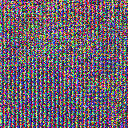

In [32]:
Image.fromarray(img, mode='RGB')

In [52]:
def imarray2pil(imarray):
    imarray = (imarray + 1.0) * 127.5
    imarray = np.round(imarray).astype('uint8')
    img = Image.fromarray(imarray)
    return img

imgs_preds = generate_image(seed=0, threshold=0.5, max_generate=100)
for img_pred in imgs_preds:
        img = img_pred[0]
        pred = img_pred[1]
        img = imarray2pil(img)
        # st.image(img)

2023-08-26 13:22:53.259 
  command:

    streamlit run /Users/hiromimatsumoto/opt/anaconda3/envs/kikagaku/lib/python3.11/site-packages/ipykernel_launcher.py [ARGUMENTS]


In [46]:
imgs_preds = generate_image(seed=0, threshold=0.5, max_generate=100)
for img_pred in imgs_preds:
    img_pred

In [47]:
img_pred

(tensor([[[[-0.0290, -0.0468, -0.0457,  ..., -0.0413, -0.0564, -0.0486],
           [-0.0526, -0.0574, -0.0590,  ..., -0.0554, -0.0744, -0.0385],
           [-0.0377, -0.0435, -0.0453,  ..., -0.0627, -0.1037, -0.0633],
           ...,
           [-0.0517, -0.0597, -0.0784,  ..., -0.0865, -0.0480, -0.0500],
           [-0.0786, -0.0716, -0.0861,  ..., -0.1142, -0.1676, -0.2106],
           [-0.0942, -0.0374,  0.0161,  ..., -0.0523, -0.0333, -0.1191]],
 
          [[-0.0503, -0.0532, -0.0599,  ..., -0.0410, -0.0898, -0.0670],
           [-0.0412, -0.0785, -0.0408,  ..., -0.0648, -0.0688, -0.0441],
           [-0.0666, -0.0561, -0.0557,  ..., -0.0329, -0.0343, -0.0588],
           ...,
           [ 0.0296, -0.1522,  0.0929,  ..., -0.3148,  0.0293, -0.1061],
           [-0.1277, -0.0227,  0.0666,  ...,  0.0859,  0.2077,  0.1876],
           [-0.0349, -0.1926,  0.0230,  ..., -0.2330, -0.0610, -0.1827]],
 
          [[-0.0520, -0.0457, -0.0666,  ..., -0.0372, -0.0653, -0.0741],
           [-